## Melbourne Housing Dataset Analysis (Group 15)
_____________________________________________________________________________________________________________________________
<h3>Context</h3>
There is a booming increase in the prices and sales of Melbourne houses in the year 2016-2017. There are many points that are coming into picture which contribute to this surge. So let us look at the data that was taken form Kaggle.<br/>
<p><b>Dataset url</b>: <a href="https://www.kaggle.com/dansbecker/melbourne-housing-snapshot"> Melbourne Housing Snapshot | Kaggle </a></p>


In [1]:
# install the necessary packages in the environment
!pip install numpy pandas scipy matplotlib seaborn plotly

In [2]:
## Required libraries in this Project

import numpy as np
import pandas as pd

# for basic analysis
import scipy

# data Visualization tools
import matplotlib as mlt
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
import pandas as pd
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
## Setting the Seabourn to dark grid
sns.set(style="darkgrid")

#### Let us import the dataset and look for the sample data

In [3]:
df = pd.read_csv('melb_data.csv')
df.sample(10)

Suburb            Address  Rooms Type      Price Method  \
8711        Kingsbury     1/37 Clunes St      3    u   488000.0      S   
1721         Carnegie    1/78 Railway Rd      1    u   330000.0      S   
3523       Kensington       15 Ormond St      4    h  1675000.0      S   
5898       Strathmore    196a Mascoma St      3    h   850000.0     VB   
11669  Ferntree Gully        7 Austin St      3    h   740000.0     SP   
6713       Yarraville  23 Castlemaine St      3    h  1380000.0      S   
11947    Clifton Hill   117 Roseneath St      4    h  1662500.0      S   
12967          Epping       28 Supply Dr      3    h   678000.0      S   
11382   Greensborough      18 Warruga Pl      3    h  1010000.0      S   
3327       Hughesdale      20 Dalston Rd      3    h  1340000.0      S   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
8711             Ray  13/05/2017      12.4    3083.0  ...       1.0  1.0   
1721   hockingstuart   6/08/2016      11.4    3163.0  ...       1.0  1.0   
3523         Rendina   7/05/2016       4.2    3031.0  ...       2.0  2.0   
5898       Considine  15/10/2016       9.7    3041.0  ...       3.0  3.0   
11669      Stockdale  22/07/2017      24.8    3156.0  ...       1.0  2.0   
6713         Village  27/11/2016       7.0    3013.0  ...       2.0  2.0   
11947         Nelson  29/07/2017       3.6    3068.0  ...       2.0  0.0   
12967  hockingstuart  19/08/2017      19.6    3076.0  ...       1.0  2.0   
11382     Buckingham  15/07/2017      16.1    3088.0  ...       2.0  2.0   
3327             Ray   3/12/2016      13.0    3166.0  ...       1.0  1.0   

       Landsize  BuildingArea  YearBuilt    CouncilArea Lattitude  Longtitude  \
8711      260.0         150.0     1961.0        Darebin -37.71570   145.03860   
1721        0.0          33.0     1970.0      Glen Eira -37.88880   145.05330   
3523      279.0           NaN        NaN      Melbourne -37.79700   144.93030   
5898      250.0         207.0     2016.0  Moonee Valley -37.71890   144.90360   
11669     968.0         118.0     1955.0           Knox -37.88523   145.28553   
6713      235.0         144.0     1910.0    Maribyrnong -37.81500   144.89280   
11947     191.0           NaN        NaN          Yarra -37.79274   144.99863   
12967     553.0           NaN     1980.0            NaN -37.65701   145.02621   
11382     582.0           NaN        NaN        Banyule -37.71325   145.09532   
3327      705.0         128.0     1920.0         Monash -37.89940   145.08160   

                  Regionname Propertycount  
8711   Northern Metropolitan        1414.0  
1721   Southern Metropolitan        7822.0  
3523   Northern Metropolitan        5263.0  
5898    Western Metropolitan        3284.0  
11669   Eastern Metropolitan       10788.0  
6713    Western Metropolitan        6543.0  
11947  Northern Metropolitan        2954.0  
12967  Northern Metropolitan       10926.0  
11382  Northern Metropolitan        8524.0  
3327   Southern Metropolitan        3145.0  

[10 rows x 21 columns]

In [4]:
df.shape

(13580, 21)

## Describing the data
<h4> There are basically 21 columns and 13580 entries in out dataset </h4>
<p>Let us go through some of the column data description</p>
Rooms: Describes the number of rooms in that house

Price: Price of that house in dollars


Type: br - bedroom(s); h - house,Vills, semi-terrace; u - unit, duplex; t - townhouse; dev site - development site

SellerG: Seller or the agent selling that property

Date: Date on which that property was sold

Distance: Distance from Crutial CDC

Regionname: Common Region names described in Melbourne

Landsize: Plot Area in of the house in Melbourne

BuildingArea: Carpet Area

# Overall Price Distribution

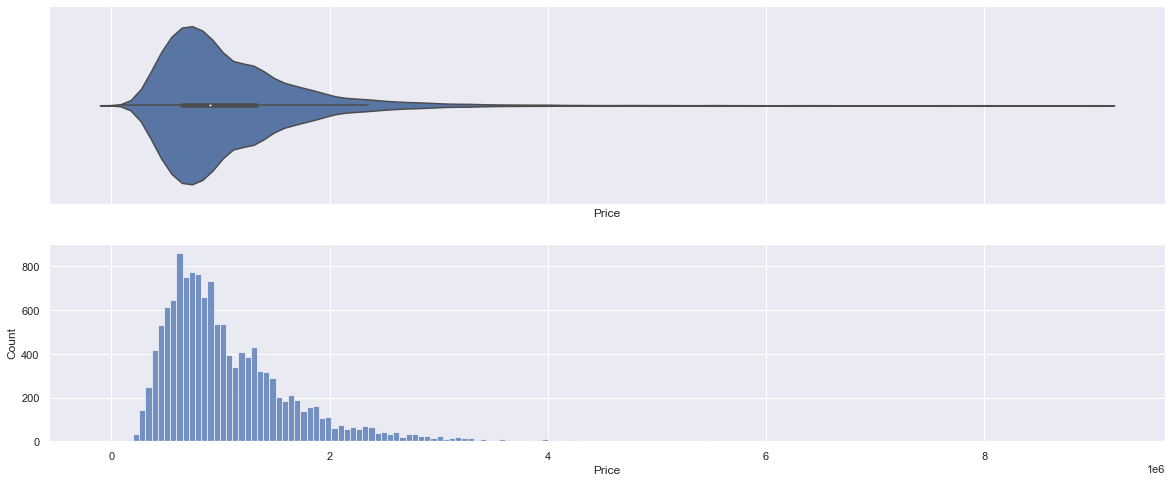

In [5]:
# Overall Price Distribution
fig_price,(ax1,ax2) = plt.subplots(2,1,figsize=(20,8),sharex=True)
sns.violinplot(x='Price',data=df,ax=ax1)
sns.histplot(x='Price',data=df,ax=ax2)
#plt.savefig('overall_price_distribution_plot.png', dpi=800, bbox_inches='tight')
plt.show()

# Count Plot for houses According to the number of Rooms

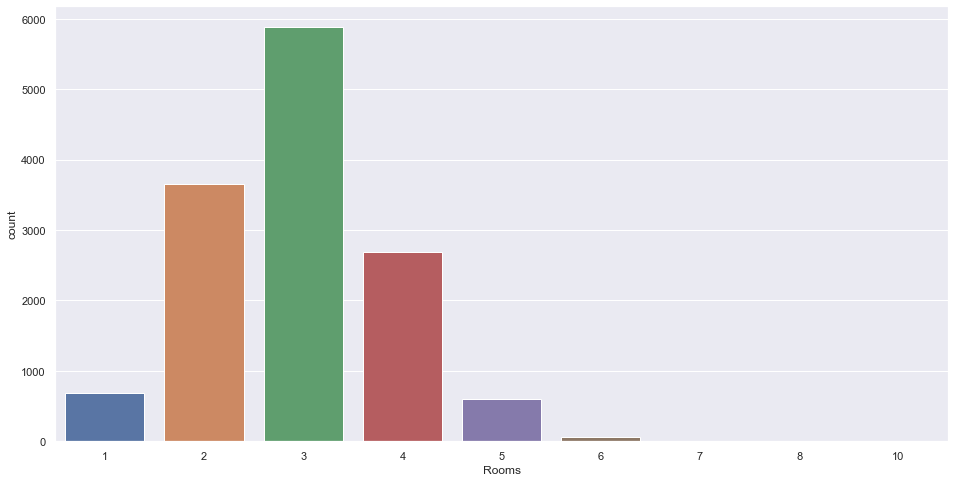

In [6]:
plt.figure(figsize=(16,8))
sns.countplot(data=df,x='Rooms')
# plt.savefig('room_count_plot.png', dpi=800, bbox_inches='tight')
plt.show()

As we can see there are <u>very less</u> houses with the <b>rooms > 5 </b> so let us change all the rooms greater than 5 to <br>"5+"</br>

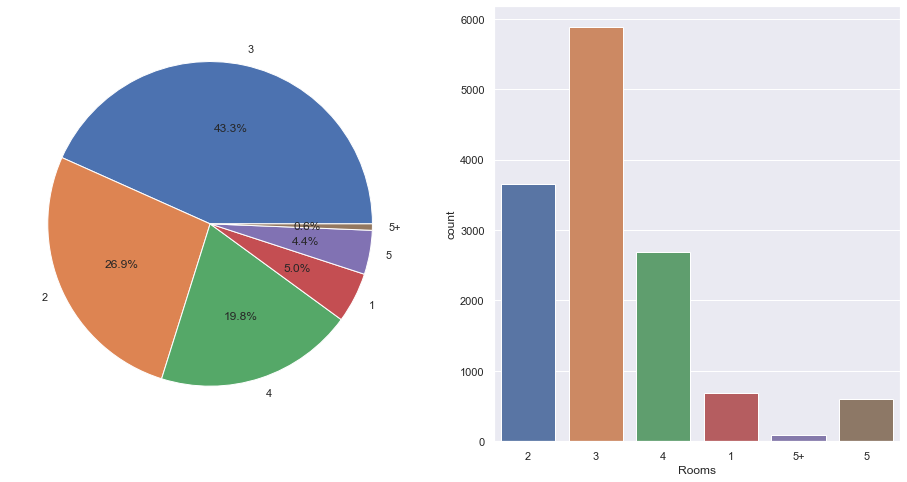

In [7]:
# Changing the values greater than 5 to 5+
df_room_change = df.copy()
df_room_change['Rooms'][df_room_change['Rooms'] > 5] = "5+"
count_rooms = df_room_change['Rooms'].value_counts()
labels_count_room = count_rooms.index.values
room_value = count_rooms.values
fig_1,(ax1,ax2) =  plt.subplots(1,2,figsize=(16,8))
ax1.pie(x=room_value,labels=labels_count_room,autopct='%1.1f%%')
sns.countplot(data=df_room_change,x='Rooms',ax=ax2)
plt.show()

<div>
    <p>As Depicted in the piechart above and the Count plot, the number of houses with 3 rooms have the highest share of 43.3% in Melbourne, followed by houese with 2 Rooms at 26.9% </p>
    <table style="margin-left:0px" border="2">
        <thead>
            <tr>
                <th>Rooms</th>
                <th>Percentage</th>
                <th>Count</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>3</td>
                <td style="background:lightgreen">43.3%</td>
                <td>5881</td>
            </tr>
            <tr>
                <td>2</td>
                <td>26.9%</td>
                <td>3648</td>
            </tr>
            <tr>
                <td>4</td>
                <td>19.8%</td>
                <td>2688</td>
            </tr>
            <tr>
                <td>1</td>
                <td>5.0%</td>
                <td>681</td>
            </tr>
            <tr>
                <td>5</td>
                <td>4.4%</td>
                <td>596</td>
            </tr>
            <tr>
                <td>5+</td>
                <td>0.6%</td>
                <td>86</td>
            </tr>
        </tbody>
    </table>
</div>

# Reperesentation of Houses with respect to rooms in any given Region

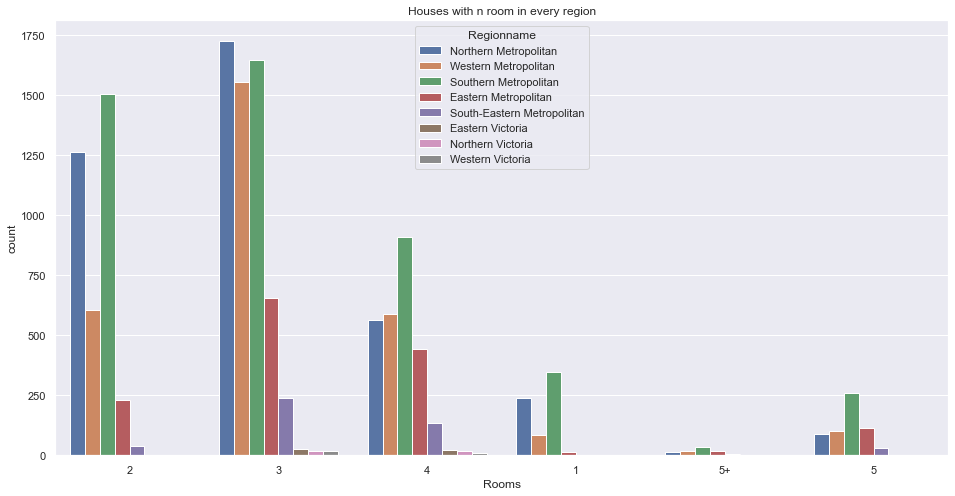

In [8]:
plt.figure(figsize=(16,8))
sns.countplot(data=df_room_change,x='Rooms',hue='Regionname')
plt.title("Houses with n room in every region")
plt.show()

### The distribution of houses with respect to rooms in every regions can be seen in the count plot above
The maxium number of n rooms in every region is highlighted in <span style="background:lightgreen;padding:0.2rem">Light Green</span> 

In [9]:
df_region_rooms = df_room_change.groupby(['Rooms',"Regionname"]).size().unstack().fillna(0)
df_region_rooms.style.highlight_max(color = 'lightgreen', axis = 1)

## Let us categorize the number of rooms with respect to types of houses
<table style="margin-left:0" border=1>
    <thead>
        <tr>
            <th>Short-form</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>h</td>
            <td> house,Vills, semi-terrace</td>
        </tr>
        <tr>
            <td>u</td>
            <td>unit, duplex</td>
        </tr>
        <tr>
            <td>t</td>
            <td> townhouse; dev site - development site</td>
        </tr>
    </tbody>
</table>

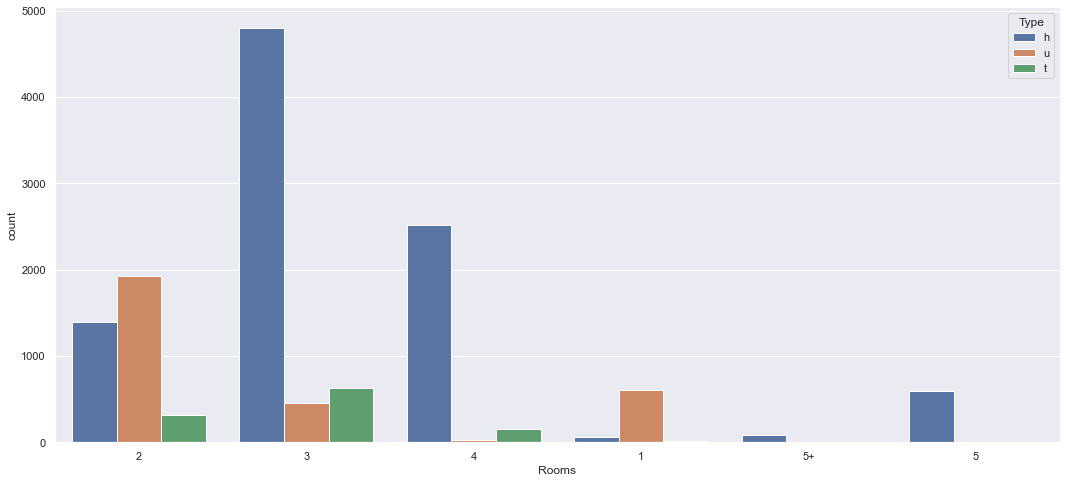

In [10]:
## Let us categorize the number of rooms with respect ot types of houses
df_room_change = df.copy()
df_room_change['Rooms'][df_room_change['Rooms'] > 5] = "5+"
plt.figure(figsize=(18,8))
sns.countplot(data=df_room_change,x='Rooms',hue='Type',)
#plt.savefig('room_style_hue.png', dpi=800, bbox_inches='tight')
plt.show()

<h4>The maxium number of type for every n rooms is highlighted in <span style="background:lightgreen;padding:0.2rem">Light Green</span> </h4>

In [11]:
df_type_rooms = df_room_change.groupby(['Rooms',"Type"]).size().unstack().fillna(0)
df_type_rooms.style.highlight_max(color = 'lightgreen', axis = 1)

# Let us look at the Realestate Sellers in Melbourne 

In [12]:
df_sellers_data = df_room_change.copy()
df['SellerG'].nunique()

268

<p style="font-size:1.5rem"> As Shown sbove there are <b><i>268</i> unique Sellers</b> in the given dataset.</p>
<p>Categorizing the data data according to such a huge range is cumbersome. So we will be looking at the <i style="background:lightgreen;padding:0.3rem">top 10 sellers</i> in Melbourne </p>

In [13]:
top_10_sellers = df_room_change['SellerG'].value_counts().index.values[:10]
dummy_seller = pd.DataFrame(df_room_change['SellerG'].value_counts()[:10])
dummy_seller.columns = ["Count"]

In [14]:
def check_seller(name):
    if name not in top_10_sellers:
        return False
    else:
        return True
df_sellers_data = df_room_change.copy()
df_sellers_data['SellerG'][~df_sellers_data['SellerG'].apply(check_seller)] = "Other"
df_top_10_sellers = df_sellers_data[df_sellers_data['SellerG']!="Other"]
data_sellers_count = pd.DataFrame(df_top_10_sellers['SellerG'].value_counts())
top_10_sum = data_sellers_count['SellerG'].sum()

def seller_percent(seller_count):
    perct = 100*seller_count/top_10_sum
    return round(perct,2)
data_sellers_count.columns = ["Count"]
data_sellers_count['Percent'] = data_sellers_count['Count'].apply(seller_percent)
data_sellers_count['Cumulative'] = data_sellers_count['Percent'].cumsum()


### Now that the top 10 sellers are filtered out, let us look at the number of properties sold by these top 10 Sellers

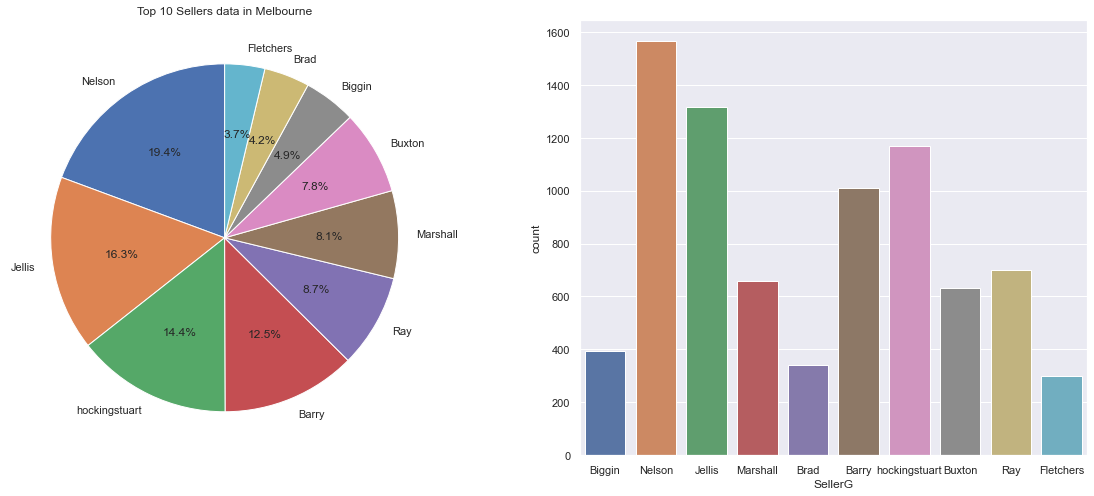

In [15]:
fig_seller , (ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
seller_labels = df_top_10_sellers['SellerG'].value_counts().index.values
ax1.pie(x=df_top_10_sellers['SellerG'].value_counts(),labels=seller_labels,autopct="%1.1f%%",startangle=90)
ax1.set_title("Top 10 Sellers data in Melbourne")
sns.countplot(data=df_top_10_sellers,x='SellerG',ax=ax2)
#plt.savefig('top_10_sellers.png', dpi=800, bbox_inches='tight')
plt.show()

### From the above figures Nelson is the top seller amongst the top 10 followed by Jellis, Hockingstuart
<p>These Three Salesman take <b>More than 50% sales</b> of top salesman in Melbourne</p>

In [16]:
data_sellers_count.style.highlight_max(color = 'lightgreen',)

### Price Distribution of top 10 realestate sellers in melbourne

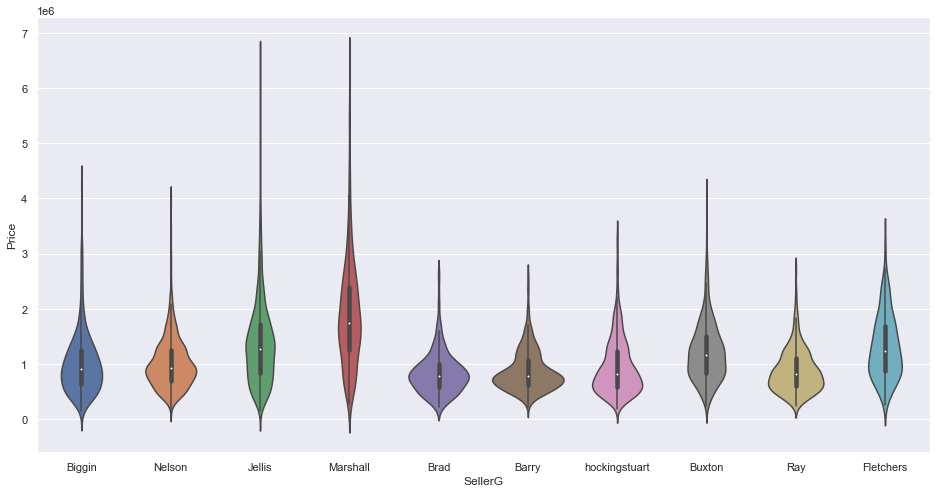

In [17]:
df_2 = df_top_10_sellers.loc[:,["SellerG","Price"]]

plt.figure(figsize=(16,8))
sns.violinplot(data=df_top_10_sellers,x='SellerG',y='Price')
#plt.savefig("Violins_sellers.png",dpi=800,bbox_inches='tight')
plt.show()

In [18]:
df_seller_price_table = df_2.groupby('SellerG').describe()
df_seller_price_table.style.highlight_max(color = 'lightgreen',)

 <h4>From the above Table it can be concluded that,</h4>
<ul>
    <li><b>Nelson</b> Has sold the most Plots</li>
    <li><b>Marshal</b> has the most lucrutive Salesman</li>
    <li><b>Jellis</b> Amons all had the top deal for <i>$6500000</i> </li>
</ul>


### We can also find out the Sellers with respect to the Regions they work in


<h4>1. Marshall Region wise distribution</h4>

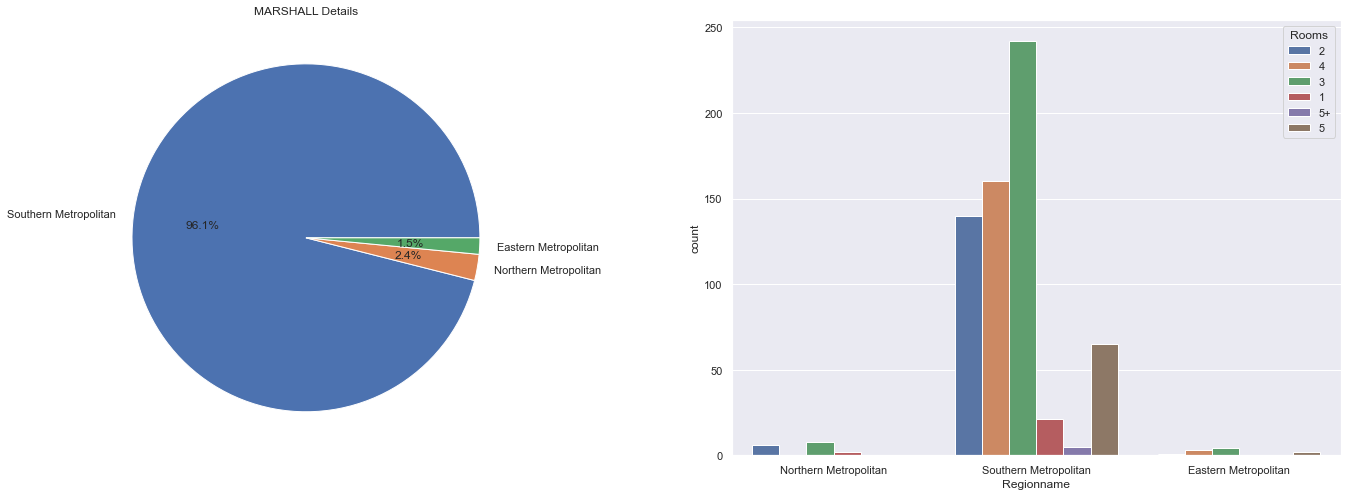

In [19]:
dummy_Marshall = df_top_10_sellers[df_top_10_sellers['SellerG'] == "Marshall"]
fig_seller, (ax1,ax2) = plt.subplots(1,2,figsize=(24,8))
region_labels = dummy_Marshall['Regionname'].value_counts().index.values
ax1.pie(x=dummy_Marshall['Regionname'].value_counts().values,labels=region_labels,autopct="%1.1f%%")
ax1.set_title(f"{'Marshall'.upper()} Details")
sns.countplot(data=dummy_Marshall,x="Regionname",hue='Rooms')
plt.show()

In [20]:
dummy_Marshall_region = dummy_Marshall.groupby(['Rooms',"Regionname"]).size().unstack().fillna(0)
dummy_Marshall_region.style.highlight_max(color = 'lightgreen', axis = 1)
# dummy_Nelson.groupby(['Rooms',"Regionname"]).size().unstack().fillna(0)

### Marshall has done most of his business in Southern Metropolitan region

<h4>2. Nelson Region wise distribution</h4>

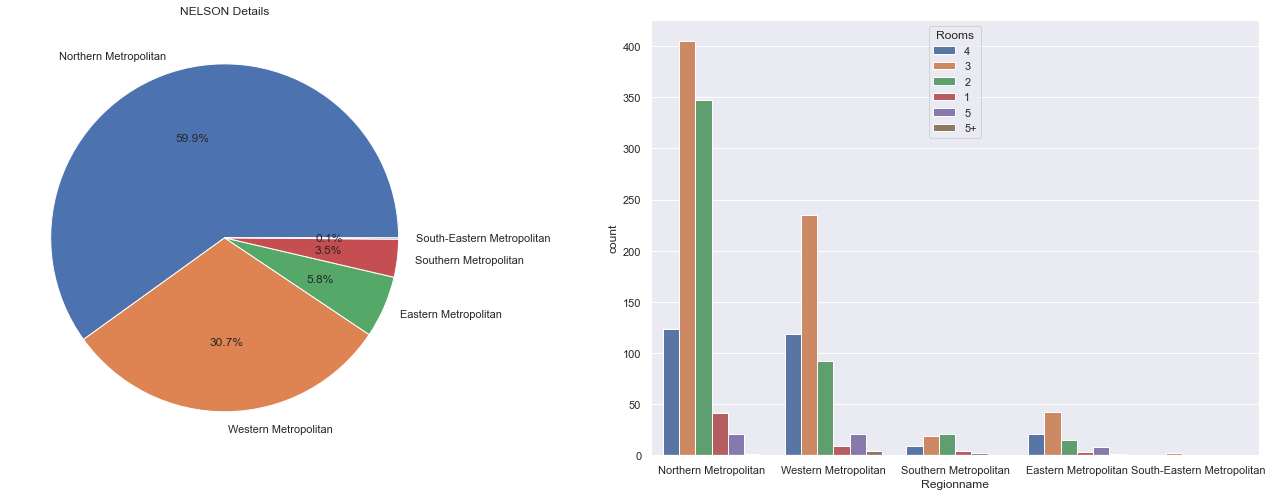

In [21]:
dummy_Nelson = df_top_10_sellers[df_top_10_sellers['SellerG'] == "Nelson"]
fig_seller, (ax1,ax2) = plt.subplots(1,2,figsize=(24,8))
region_labels = dummy_Nelson['Regionname'].value_counts().index.values
ax1.pie(x=dummy_Nelson['Regionname'].value_counts().values,labels=region_labels,autopct="%1.1f%%")
ax1.set_title(f"{'Nelson'.upper()} Details")
sns.countplot(data=dummy_Nelson,x="Regionname",hue='Rooms')
plt.show()

In [22]:
dummy_Nelson_region = dummy_Nelson.groupby(['Rooms',"Regionname"]).size().unstack().fillna(0)
dummy_Nelson_region.style.highlight_max(color = 'lightgreen', axis = 1)

### From the Above table Nelson has done most of his business in Southern Metropolitan region

##  Price and Rooms distribution on a regional Basis
We will be looking at the Region wise distribution of houses with rooms and range of those rooms

#### 1. Northern Metropolitan Room Destribution with respect to their prices

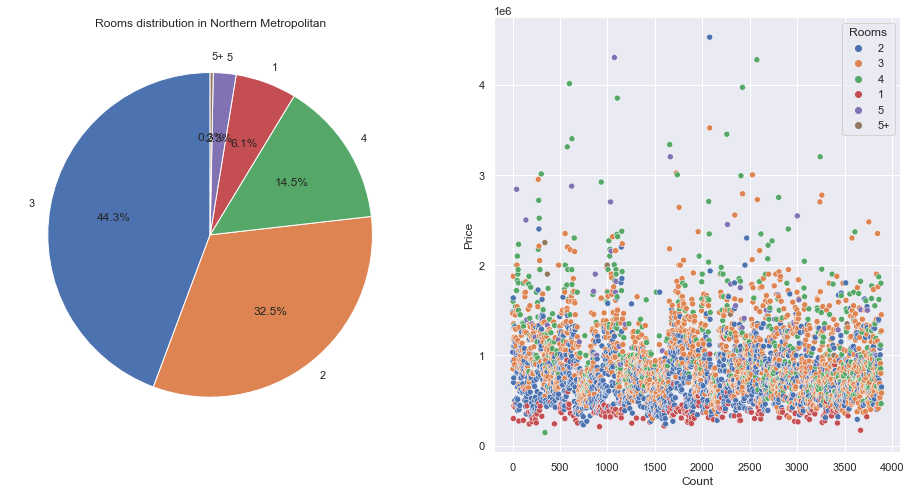

In [23]:
region_df = df_room_change[df_room_change["Regionname"]=="Northern Metropolitan"].copy()
region_df['count_index'] = range(len(region_df))
fig_regional_dist, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
rooms_for_region_label = region_df['Rooms'].value_counts().index.values
rooms_for_region_values = region_df['Rooms'].value_counts().values
ax1.pie(x=rooms_for_region_values,labels=rooms_for_region_label,autopct="%1.1f%%",startangle=90)
ax1.set_title(f"Rooms distribution in Northern Metropolitan")
sns.scatterplot(data=region_df,x='count_index',y='Price',hue='Rooms')
ax2.set_xlabel('Count')
plt.show()

In [24]:
region_df = df_room_change[df_room_change["Regionname"]=="Northern Metropolitan"].copy()
df_seller_price_table = region_df.loc[:,["Regionname","Rooms","Price"]].groupby(['Regionname',"Rooms"]).describe()
df_seller_price_table.style.highlight_max(color = 'lightgreen',)

#### 2. South-Eastern Metropolitan	 Room Destribution with respect to their prices

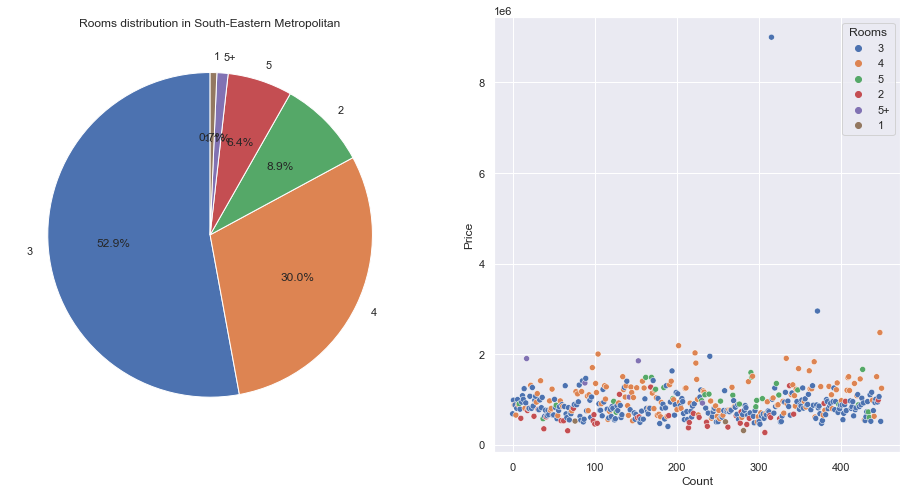

In [25]:
region_df = df_room_change[df_room_change["Regionname"]=="South-Eastern Metropolitan"].copy()
region_df['count_index'] = range(len(region_df))
fig_regional_dist, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
rooms_for_region_label = region_df['Rooms'].value_counts().index.values
rooms_for_region_values = region_df['Rooms'].value_counts().values
ax1.pie(x=rooms_for_region_values,labels=rooms_for_region_label,autopct="%1.1f%%",startangle=90)
ax1.set_title(f"Rooms distribution in South-Eastern Metropolitan")
sns.scatterplot(data=region_df,x='count_index',y='Price',hue='Rooms')
ax2.set_xlabel('Count')
plt.show()

In [26]:
region_df = df_room_change[df_room_change["Regionname"]=="South-Eastern Metropolitan"].copy()
df_seller_price_table = region_df.loc[:,["Regionname","Rooms","Price"]].groupby(['Regionname',"Rooms"]).describe()
df_seller_price_table.style.highlight_max(color = 'lightgreen',)

## Let us see correlation  between all the columns

<AxesSubplot:>

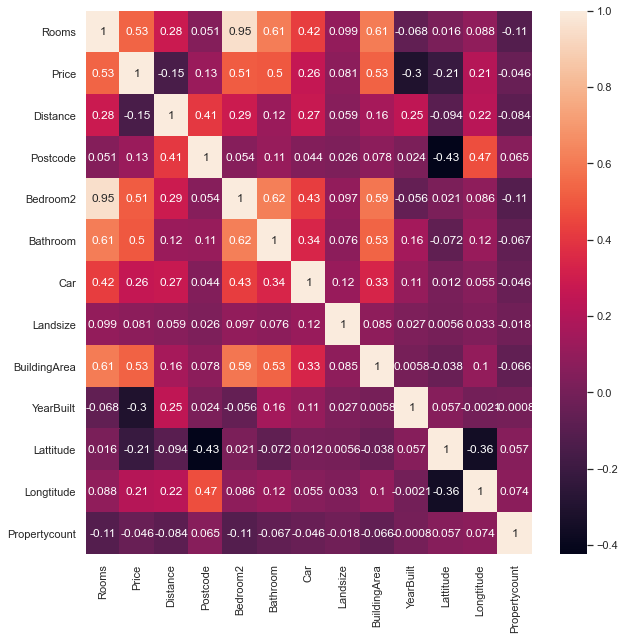

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df.dropna().corr(),annot=True)

## If Price was the main Criteria then according to the Heatmap Price is best influenced by 
<ol type='1'>
        <li>Rooms</li>
        <li>Building Area</li>
        <li>Beedroom2</li>
      </ol>

## Monthwise Distribution of housing Sales in Melbourne

In [28]:
df_date_data = df_room_change.copy()
sr=pd.to_datetime(df_date_data['Date'])
df_date_data['Month'] = sr.dt.month_name(locale = 'English')
df_date_data['Year'] = pd.DatetimeIndex(df_date_data['Date']).year

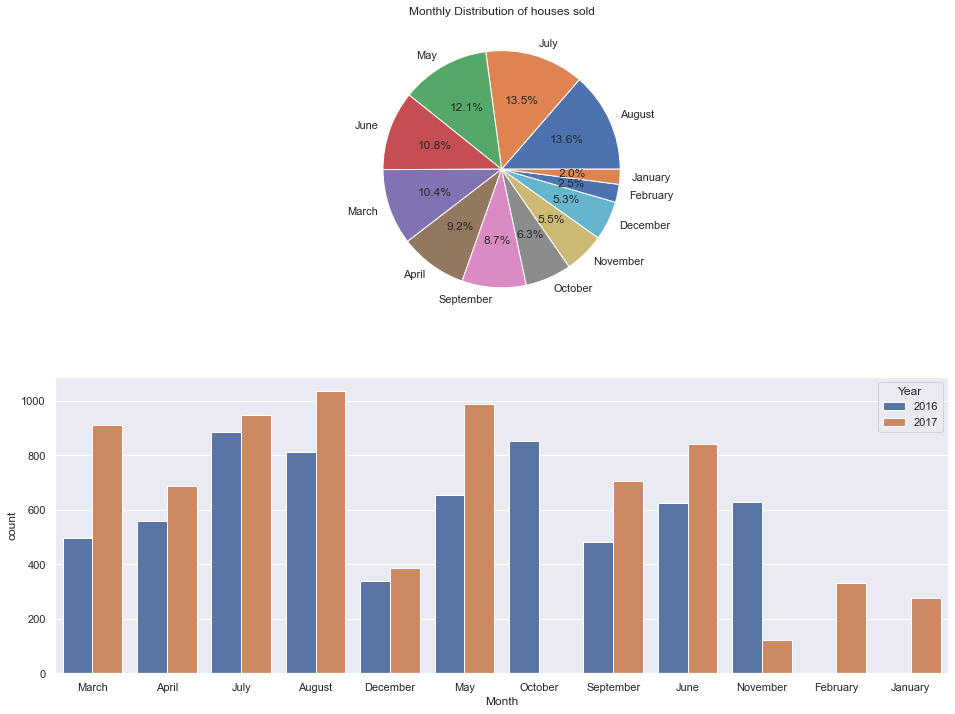

In [29]:
fig_month,(a1,a2) = plt.subplots(2,1,figsize=(16,12)) 
sns.countplot(data=df_date_data,x='Month',hue='Year',ax=a2)
month_labels = df_date_data['Month'].value_counts().index.values
sold_counts = df_date_data['Month'].value_counts().values
a1.pie(x=sold_counts,labels=month_labels,autopct="%1.1f%%")
a1.set_title("Monthly Distribution of houses sold")
#plt.savefig('month_wise_sales.png', dpi=800, bbox_inches='tight')
plt.show()

In [30]:
df_date_sales = df_date_data.loc[:,["Month","Year","Propertycount"]].groupby(['Month',"Year"]).size().unstack().fillna(0)
df_date_sales.style.highlight_max(color = 'lightgreen',)

From the Above data we can say that almost 50% of sales are done in
<ol>
    <li>May</li>
    <li>June</li>
    <li>July</li>
    <li>August</li>
</ol>
<ul>
    <li>Max Sales in 2016 being in <b>July</b></li>
    <li>Max Sales in 2017 being in <b>August</b></li>
</ul>

# Regionwise Plot for Houses in Melbourne

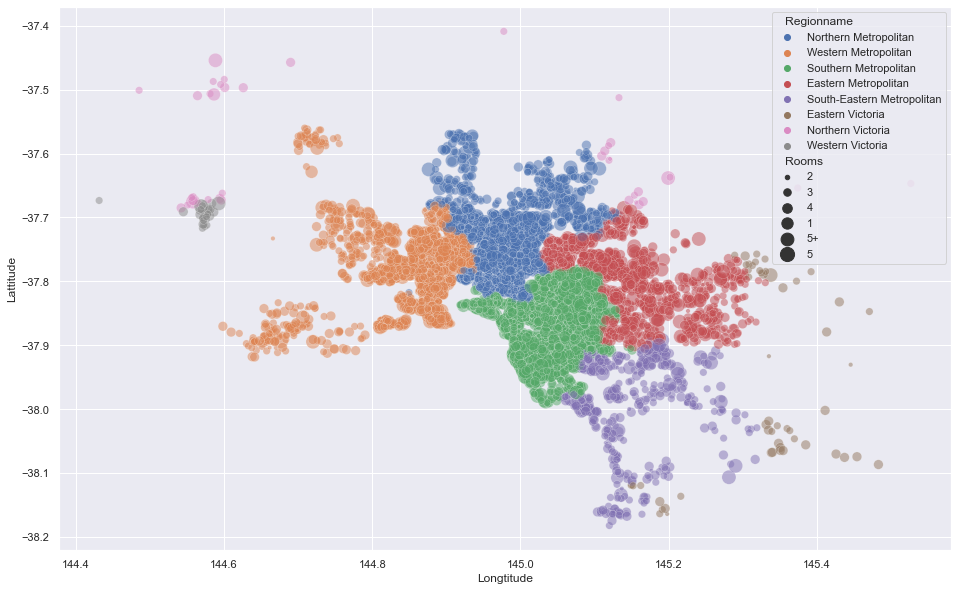

In [31]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_room_change,x='Longtitude',y='Lattitude',hue="Regionname",size="Rooms",sizes=(200,20),alpha=0.5)
plt.show()

# Top 10 sellerwise distribution plot in Melbourne

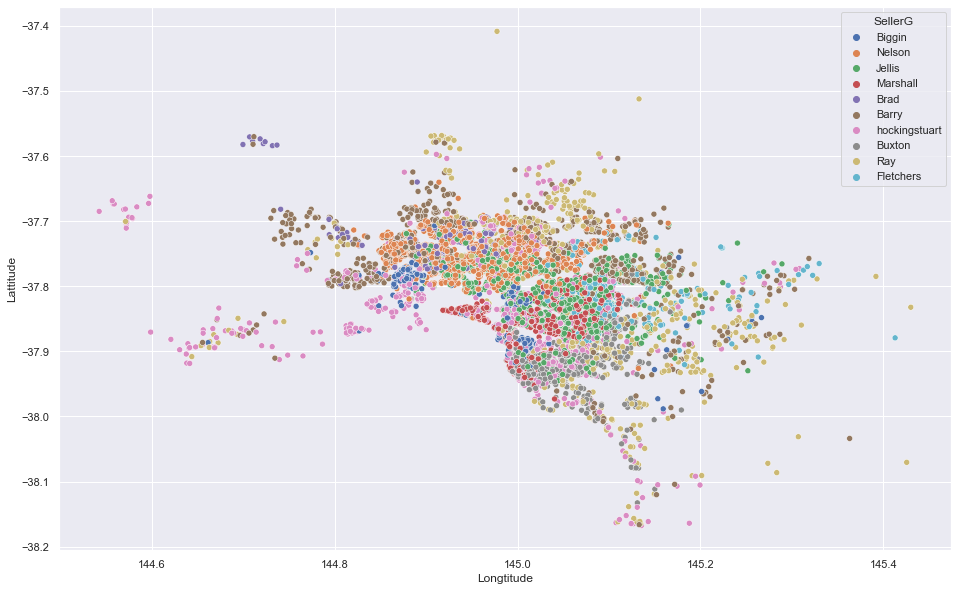

In [32]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_top_10_sellers,x='Longtitude',y='Lattitude',hue="SellerG")
plt.show()

In [33]:
seller_loc = df_top_10_sellers[['Lattitude', 'Longtitude', 'Regionname', 'SellerG','Price','Rooms']].copy()
fig = px.scatter_mapbox(seller_loc, lat="Lattitude", lon="Longtitude", hover_name="Regionname",hover_data=['Regionname',"Price",'Rooms'],
                         color='SellerG',zoom=10, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<h1 style="color:red"> It could happen that the plotly plots might not render </h1>
We are still including the renderof our plot
<img src="plotly_data.png"></img>

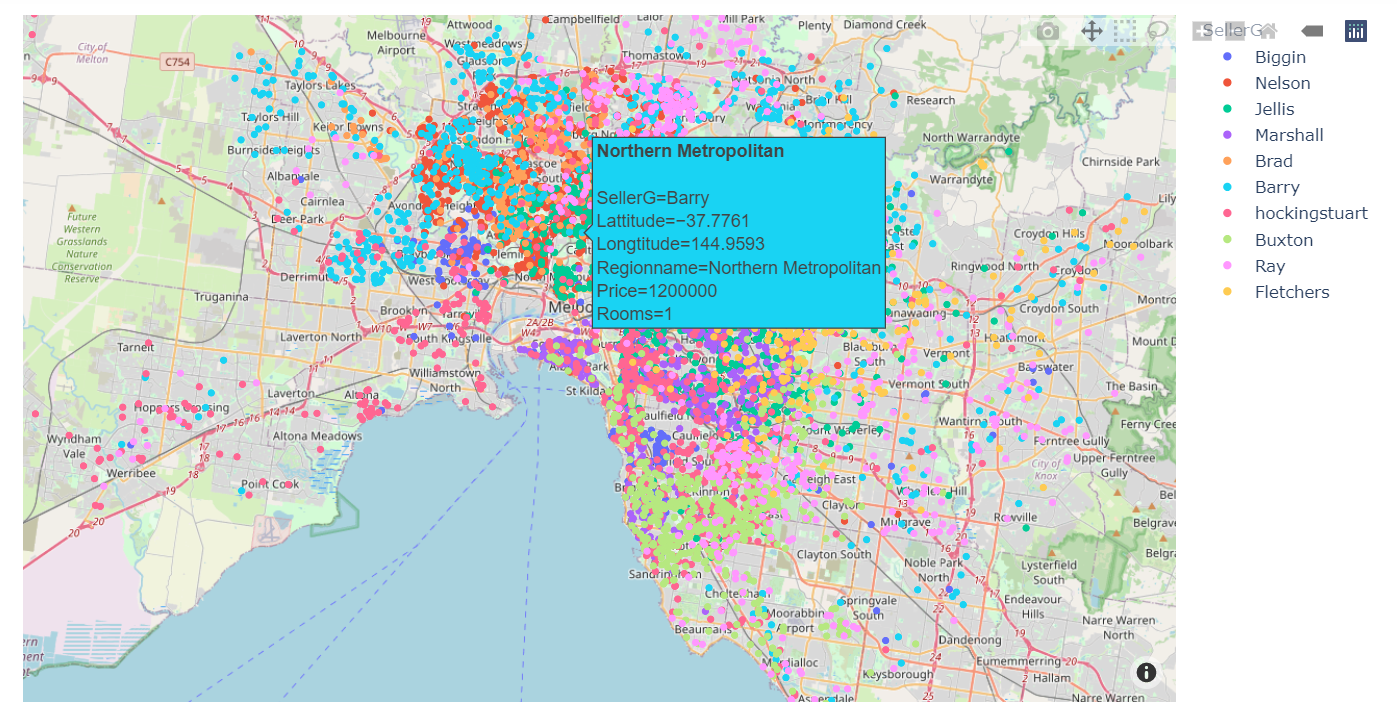

In [34]:
from IPython.display import Image
Image("plotly_data.png")

<div>
    <h2>Group Members Contribution in the Project</h2>
    <p>All the Group members had equal Contribution in Visualization and other aspects of the project</p>
    <ul>
        <li>Data Processing was done by all however Sanket Chandekar(21030242053) Focused more on this topic</li>
        <li>Logic Building was done by all however Vaibhav Pharate(21030242053) Focused more on this topic</li>
        <li>Plot Categorization was done by all however Shivani Gaikwad(21030242022) Focused more on this topic</li>
        <li>Taking inference was done by all however Akshat Goswami(21030242005) Focused more on this topic</li>
        <li>Report Building was done by all however Manish Ghosh(21030242032) Focused more on this topic</li>
    </ul>
</div>